# Scientific computing set 3
Sander Broos, Nick van Santen

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from wave_equation import WaveEquation
from spring import Spring

In [2]:
# Run cell to increase font sizes. Usefull when saving plots
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["figure.figsize"] = (8,6)

## Part 1

2.5109963417053223 s


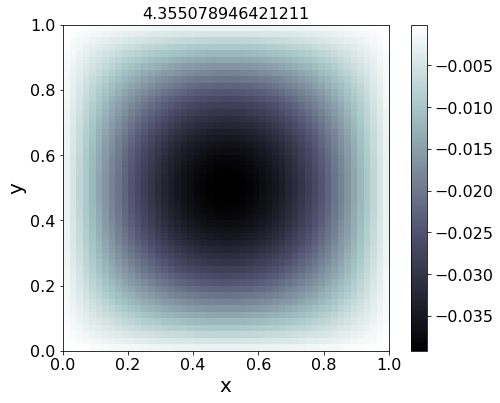

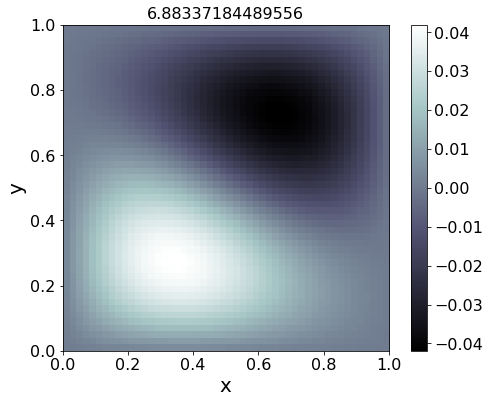

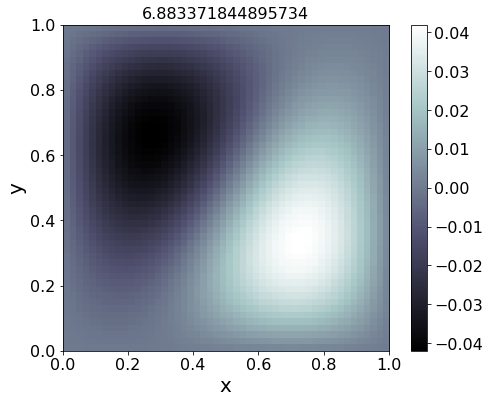

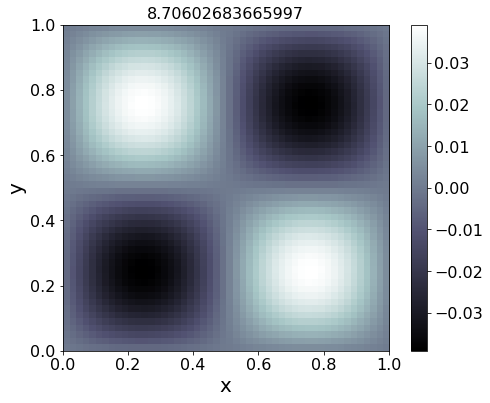

14.493000745773315 s


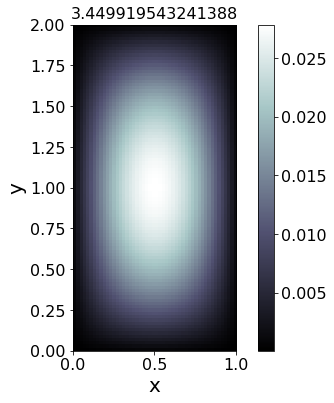

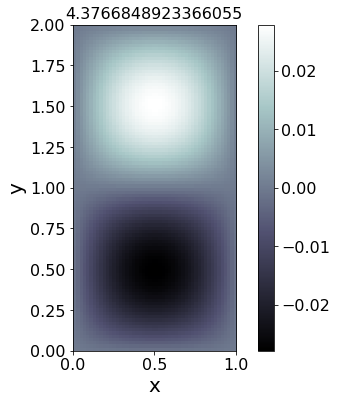

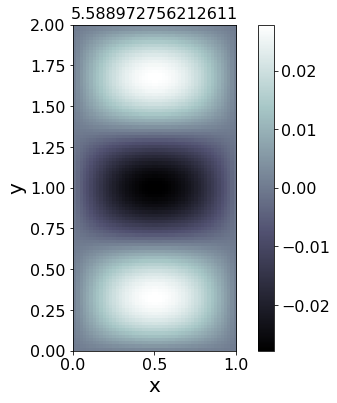

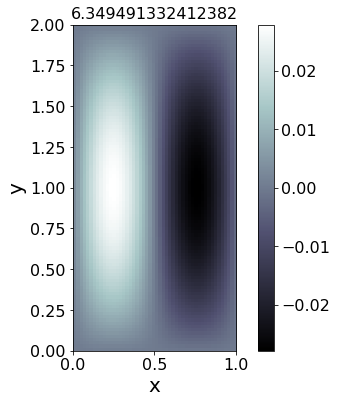

2.156001567840576 s


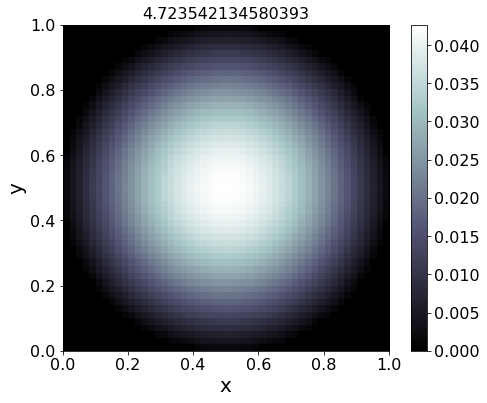

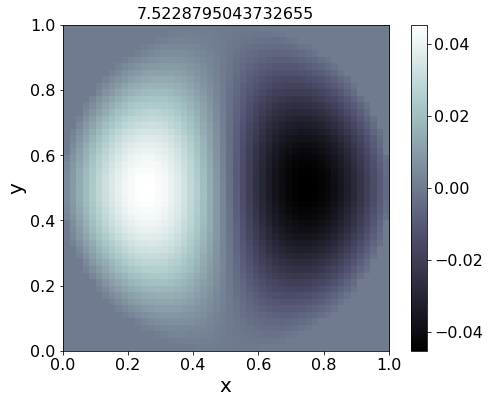

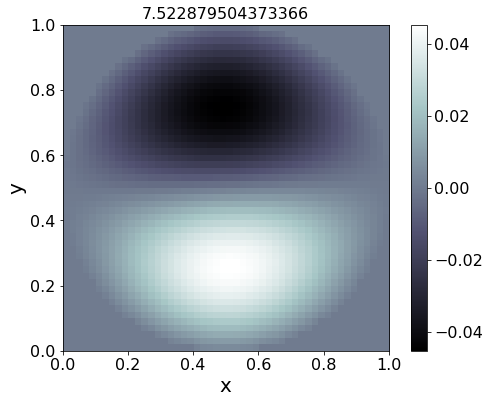

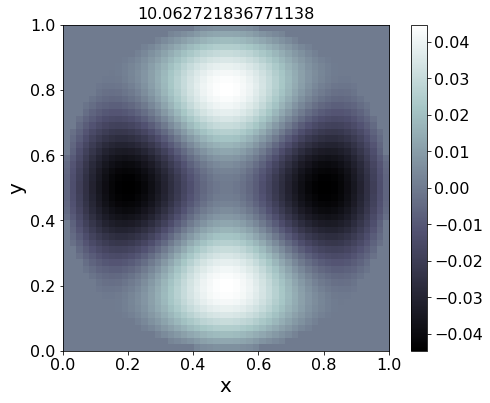

In [4]:
WaveEquation(dx=0.02, L_x = 1, L_y = 1, circle=False, sparse=True).show_eigenvectors(4)
WaveEquation(dx=0.02, L_x = 1, L_y = 2, circle=False, sparse=True).show_eigenvectors(4)
WaveEquation(dx=0.02, L_x = 1, L_y = 1, circle=True, sparse=True).show_eigenvectors(4)

0.03
0.03777777777777778
0.04555555555555556
0.05333333333333333
0.061111111111111116
0.06888888888888889
0.07666666666666666
0.08444444444444445
0.09222222222222223
0.1


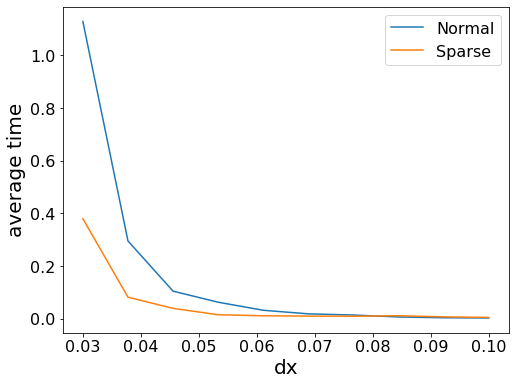

In [13]:
standard_avgs = []
sparse_avgs = []
dx_values = np.linspace(0.03, 0.1, 10)
N = 10

for dx in dx_values:
    print(dx)
    standard = []
    sparse = []

    for _ in range(N):
        standard.append(WaveEquation(dx=dx, L_x = 1, L_y = 1, circle=False, sparse=False).eigenvalues(10)[2])
        sparse.append(WaveEquation(dx=dx, L_x = 1, L_y = 1, circle=False, sparse=True).eigenvalues(10)[2])
    
    standard_avgs.append(np.mean(standard))
    sparse_avgs.append(np.mean(sparse))

# plt.yscale('log')
plt.plot(dx_values, standard_avgs, label="Normal")
plt.plot(dx_values, sparse_avgs, label="Sparse")
plt.legend()
plt.ylabel("average time")
plt.xlabel("dx")
plt.show()

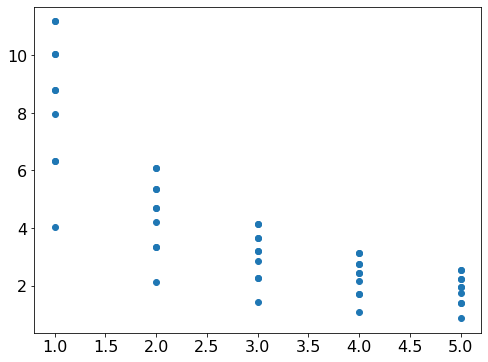

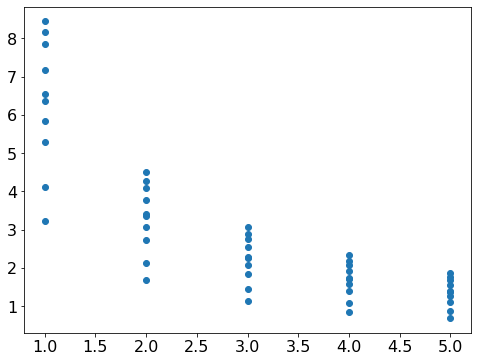

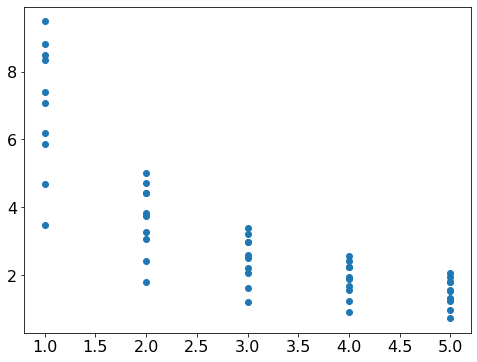

In [13]:
def spectrum_per_L(L_x, L_y, circle):
    L_values = []
    freqs = []

    for L in range(1, 6):
        print(L, end='\r')
        eigenfreqs = np.sqrt(-1*np.array(WaveEquation(dx=0.1, L_x = L_x*L, L_y = L_y*L, circle=circle, sparse=True).eigenvalues(10)[0]))
        freqs.extend(eigenfreqs)
        for _ in range(len(eigenfreqs)):
            L_values.append(L)

    plt.scatter(L_values, freqs)
    plt.show()

spectrum_per_L(1, 1, False)
spectrum_per_L(2, 1, False)
spectrum_per_L(2, 1, True)

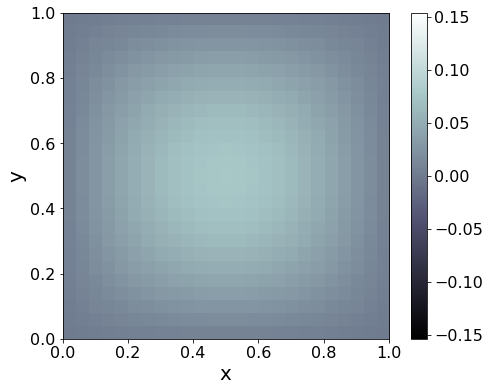

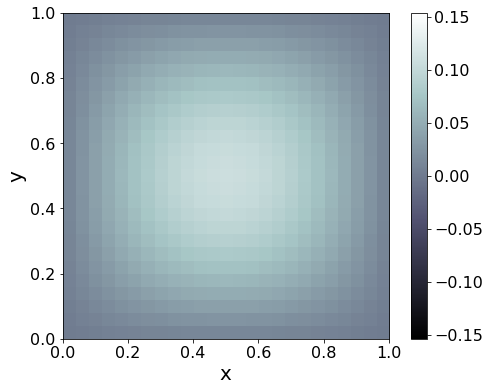

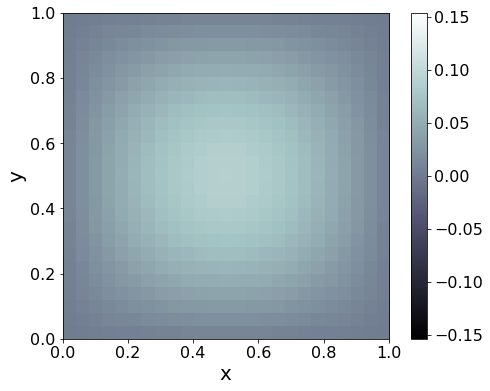

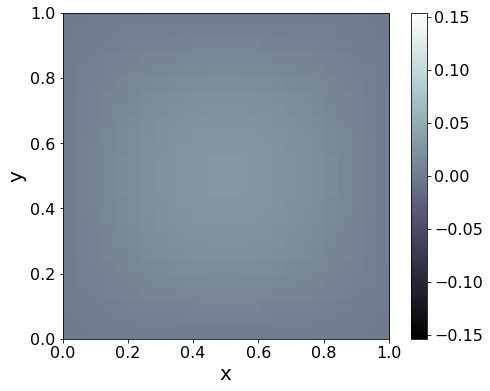

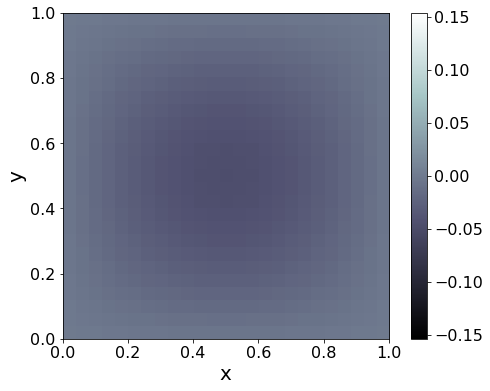

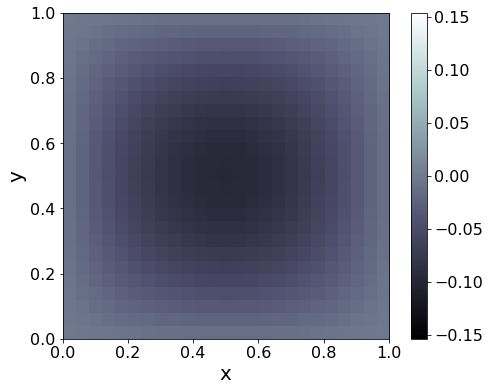

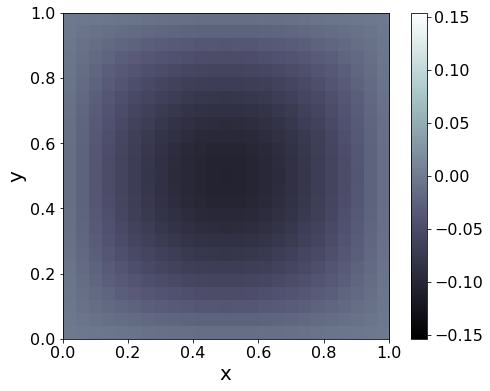

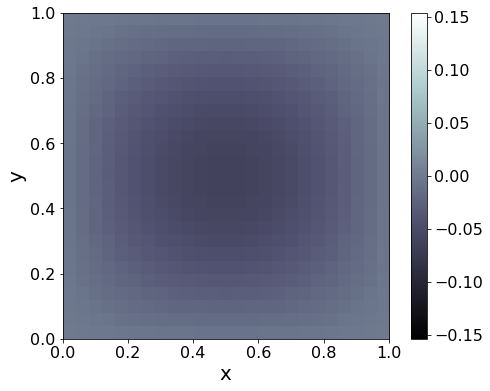

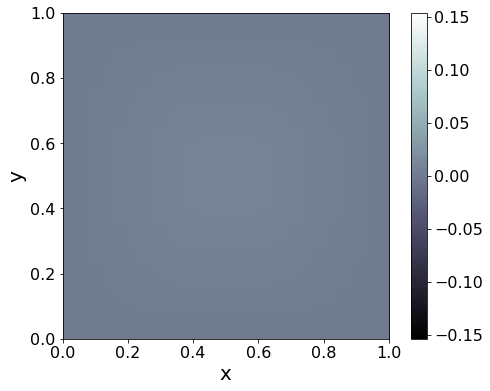

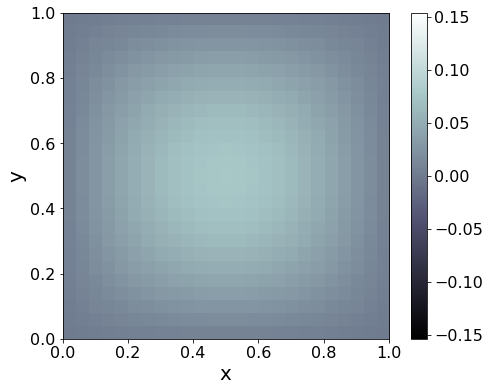

In [7]:
from matplotlib.colors import Normalize

def time_behavior(L_x, L_y, circle):
    wave = WaveEquation(dx=0.04, L_x = L_x, L_y = L_y, circle=circle, sparse=True)
    
    eigendata = wave.eigenvalues(1)
    eigenvalue = eigendata[0][0]
    eigenvector = eigendata[1][0]

    for t in np.linspace(0, 2*np.pi / (-eigenvalue)**0.5, 10):
        T = wave.time_dependence(t, eigenvalue)
        wave.make_plot(np.reshape(eigenvector, (wave.M, wave.N)) * T, norm=Normalize(-np.amax(eigenvector) * 2, np.amax(eigenvector) * 2))

time_behavior(1, 1, False)

# TODO van hoeveel vormen moet dit?

In [ ]:
# TODO filmpjes opslaan

## Part 2

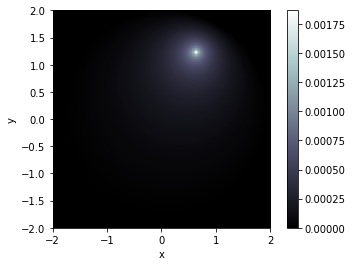

In [14]:
WaveEquation(dx=0.05, L_x=4, L_y=4, circle=True).direct_method()

## Part 3

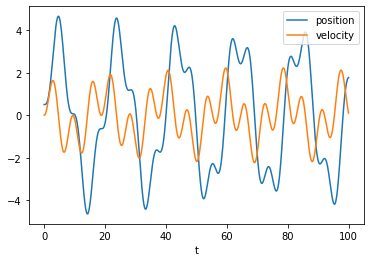

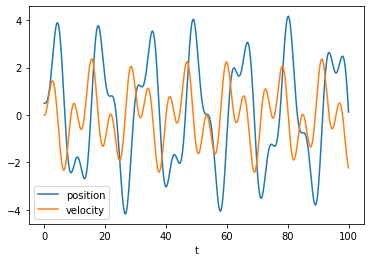

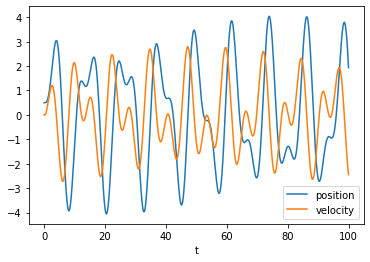

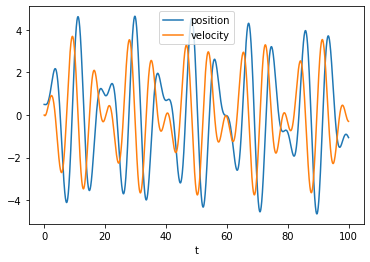

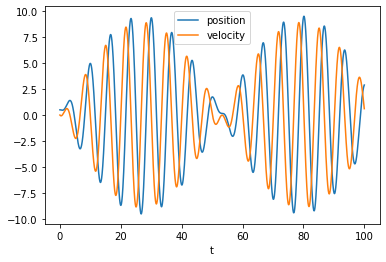

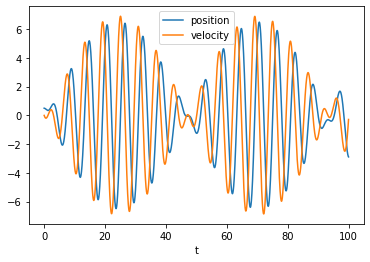

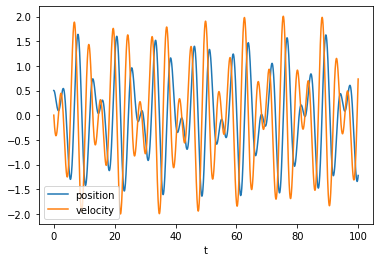

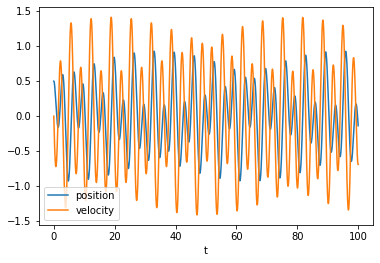

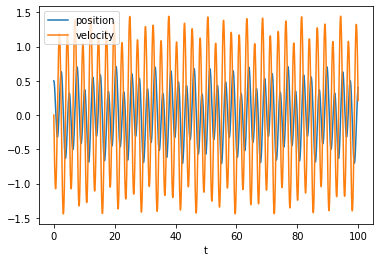

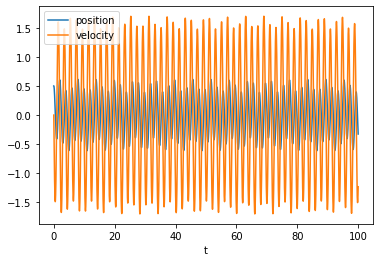

In [7]:
for k in np.logspace(-1, 1, 10):
    spring = Spring(0.5, 0, dt=0.01, k=k, driving_force_amplitude=1)
    spring.run(iterations=10000)
    spring.create_plot()

plt.show()


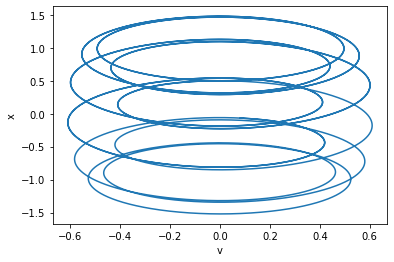

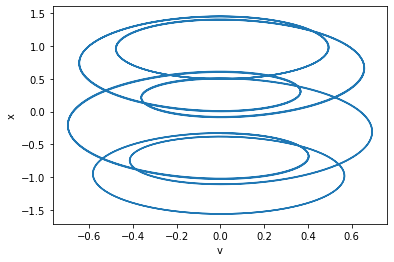

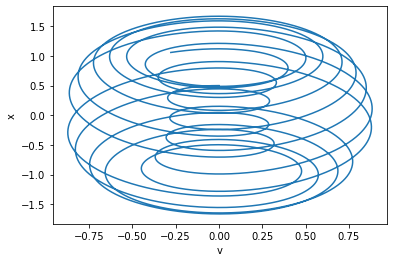

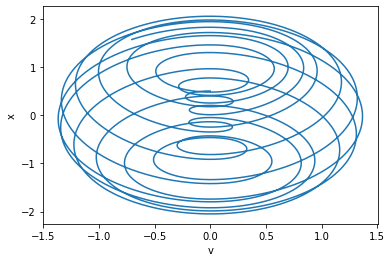

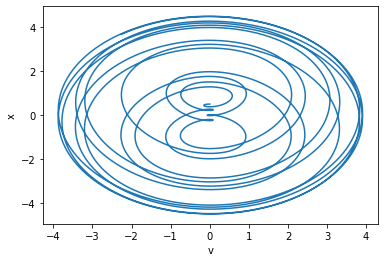

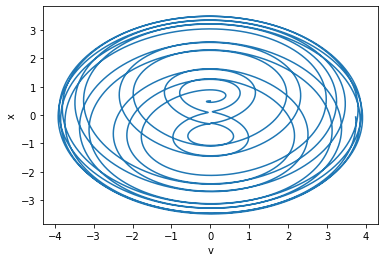

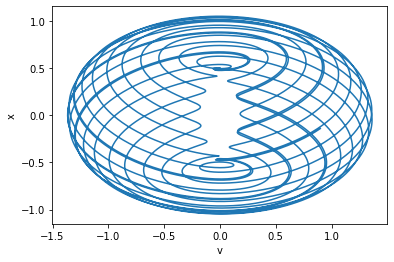

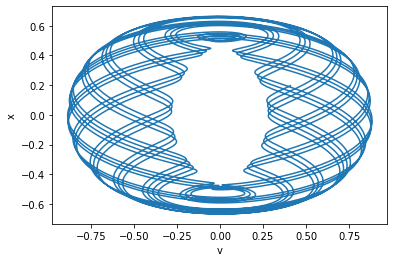

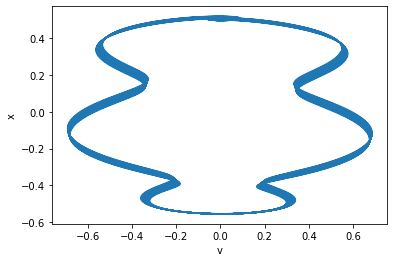

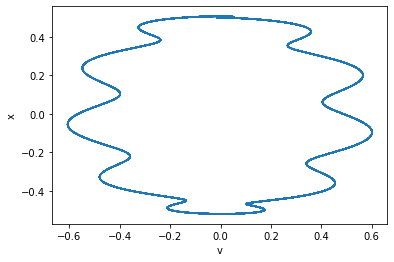

In [8]:
for omega in np.logspace(-1, 1, 10):

    spring = Spring(0.5, 0, driving_force_amplitude=1, omega=omega)
    spring.run(iterations=10000)
    spring.create_phase_plot()

plt.show()